In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# On the Probability of Finding an Open Bathroom

Sharing a single bathroom with several roommates can be frustrating because it's often occupied when you need it. Personal experience with living in large communal houses with multiple bathrooms leads us to believe that having more bathrooms makes it easier to find one unoccupied in your hour of need, even when the resident-to-bathroom ratio is similar to that of a smaller house.

Is this just a case of selective memory? Or is greater bathroom access a legitimate benefit of large community housing?

## Definitions

Consider a house with $B$ bathrooms and $R$ residents.

The probability of at least one bathroom being available is $A$.

## A Simple Answer

We'll treat bathroom occupancy as a random event. When nature calls, we observe the state of each bathroom, which we might find to be *occupied* or *available*, independent of its previous states or the states of the other bathrooms.

Let's make the simplifying assumption that each observation of a bathroom has a constant probability $p$ of an *occupied* result, and a probability $1-p$ of an *available* result. Further, we'll just assume that $p$ is independent of $B$. That is, regardless of the number of bathrooms in the house, any individual bathroom is equally likely to be occupied. Intuitively, this assumption seems closely related to keeping a constant resident-to-bathroom ratio between houses. But it's certainly an unjustified simplification.

Then, the probability of every bathroom being occupied is $p^B$.
This is because the probability of independent events happening is equal to the product of their probabilities. For example, if you roll one die, the likelihood of getting a four is $1/6$. If you roll two dice, the likelihood of getting two fours is $1/6*1/6 = (1/6)^2 = 1/36$. In this example $p = 1/6, B = 2$ and $p^B = 1/36$. If you roll three dice, the likelihood of getting three fours is $1/6*1/6*1/6 = (1/6)^3 = 1/216$. Good luck! ;)

The probability of every bathroom being available is $(1-p)^B$.
Again, this is because we multiply the independent probabilities to get the total probability. This time, instead of multiplying the probability that each bathroom is occupied, we multiply the probabilities that each bathroom is available, $(1-p)$.

However, when you're living communally you don't need every bathroom to be available--you just need one! So we're interested in the probability that *at least* one bathroom is available. Another way to phrase "at least one bathroom is available" is "not every bathroom is occupied". And since there are only two possibilities, either all bathrooms are occupied or not all bathrooms are occupied, the sum of these probabilities must equal 100%. So we can write: The probability that not every bathroom is occupied = 100% - (the probability of every bathroom being occupied). Or, in mathematical shorthand:

$P = 1 - p^B$ = The probability that at least one bathroom is free.

# Example

$p = 0.1$, $B = 2$

Both occupied: $P = p^2 = 0.1^2 = 0.01 = 1\%$

Both available: $P = (1-p)^2 = 0.9^2 = 0.81 = 81\%$

Now, there are two ways that exactly one could be occupied:
- #1 is occupied, #2 is available
- #1 is available, #2 is occupied

We have to consider both scenarios and add their probabilities.

$P = P_1 + P_2 = [p(1-p)] + [(1-p)p] = 2p(1-p) = 2 \cdot 0.1 \cdot 0.9 = 0.18 = 18\%$

So the sum of all the probabilities is 100%, which is good.

In [2]:
def prob_at_least_one_free(B, p):
  return 1 - p ** B

B_arr = np.arange(1, 21)
p_arr = np.arange(.05, 1.0, step=0.05)
p_arr_cont = np.linspace(0, 1.0, 101)[1:-1]

In [3]:
B_arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [4]:
p_arr_cont

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

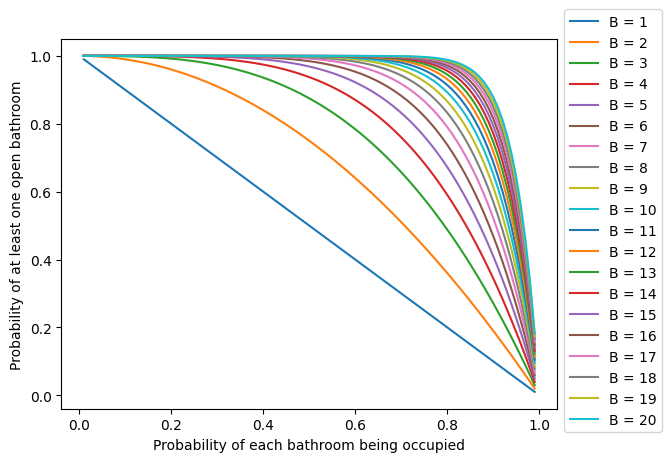

In [5]:
#plt.figure(figsize=(10, 5))
for B in B_arr: #The for loop gives you a plot for each number of bathrooms, 1 through 20.
  plt.plot(p_arr_cont, prob_at_least_one_free(B, p_arr_cont), label='B = {}'.format(B))
  #plt.plot uses the plot function from the matplotlib module which takes an array of x-values and an array of y-values
  #and makes a plot out of them. Here our x-values are a range of 99 probabilities from 0 to 1 incrementing by .01
  #and our y-values are the 99 corresponding probabilities that at least one bathroom is free.

plt.xlabel('Probability of each bathroom being occupied') #xlabel is a function that allows you to label the plot's x-axis
plt.ylabel('Probability of at least one open bathroom') #ylabel is a function that allows you to label the plot's y-axis
plt.legend(bbox_to_anchor=(1, 1.1)) #legend is a function that creates a legend. The bbox_to_anchor controls the x and y-values of your legend's placement.

## A Detailed Answer

Assume everyone visits the bathroom once during rush hour.

Rush hour is $H$ minutes long, and the average bathroom usage is $\lambda$ minutes.

We'll say $H = 120$, $\lambda = 20$.

Then, at any given moment during rush hour, each person has a probability of $q = \lambda / H$ of being in the bathroom.

Then, the probability of everybody needing to use the bathroom simultaneously is $q^R$ and the probability of nobody needing to use a bathroom at a specific moment is $(1-q)^R$.

The probability of exactly $n$ people needing to use the bathroom simultaneously is $P_n = {R \choose n} q^n(1-q)^{R-n}$.

The probability that at least one bathroom is available is equivalent to the probability that the number of people needing to use the bathroom is less than the number of bathrooms.

That is,

\begin{equation}
  A = \sum_{n=0}^{B-1} P_n
\end{equation}

The above function calculates the probability that at least one bathroom is free by adding the individual probabilities that 0 people will be in the bathroom, 1 person will be in a bathroom, 2 people will be in bathrooms, 3 people will be in bathrooms, etc, up to one less than the total number of bathrooms. Adding these together gives the total probability that at least one bathroom is empty!

In [6]:
R_arr = np.arange(61) #Makes an array called "R_arr" from 0 to 60 in increasing numerical order
lam = 20 #Define a variable named lam which represents average bathroom usage time and set it to 20 minutes
H = 120 #Define a variable named H which represents the amount of time "Rush Hour" for bathrooms in a co-op are and sets it to 120 minutes
q = lam / H #Defines a variable named q which represents the probability each person has of being in a bathroom during rush hour

In [7]:
def P(R, n, q): #Defines a function "P" which takes R (total # residents), n (# people needing to use the bathroom at a particular moment?) and q (defined above)
  return comb(R, n) * q**n * (1-q)**(R-n) #comb from scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html
#The above function returns the probability of n people needing to use the bathroom simultaneously
#during "rush hour" in a house with R residents

def A(B, R, q):
  return sum(P(R, n, q) for n in range(B))
#The above function gives the probability that the number of ppl needing to use the bathroom
#is less than the number of bathrooms. It calculates this by adding the individual probabilities
#that 0 ppl will need to use the bathroom, 1 person will need to use the bathroom,
#2 ppl will need to use the bathroom, 3 ppl will need to use the bathroom, etc
#up to one less than the total number of bathrooms.
#Adding these together gives the total probability that at least one bathroom is empty!

def plot_house(B, R, q, label):
  plt.plot(R, A(B, R, q), 'o', label=label)

#The above function creates a plot for a specific house with B bathrooms, R residents, and
#q likelihood of a resident being in a bathroom during "rush hour". You can also define
#the name of the house with the label argument.
#It plots the probability of at least one bathroom being free vs number of residents for that house!

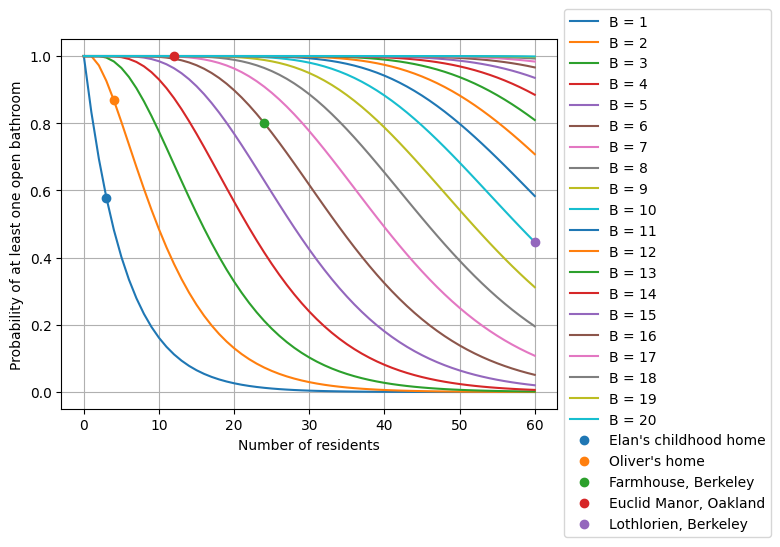

In [8]:
#plt.figure(figsize=(10, 5))
for B in B_arr:
  plt.plot(R_arr, A(B, R_arr, q), label='B = {}'.format(B))

#The above creates 20 plots of the probability of at least one bathroom being free vs
#number of residents for houses with 1 through 20 bathrooms.
#(Each time it runs through the for loop it creates a new plot for the next number of bathrooms)

plot_house(1, 3, q, "Elan's childhood home")
plot_house(2, 4, q, "Oliver's home")
plot_house(6, 24, q, "Farmhouse, Berkeley")
plot_house(7, 12, q, "Euclid Manor, Oakland")
plot_house(10, 60, q, "Lothlorien, Berkeley")

plt.xlabel('Number of residents')
plt.ylabel('Probability of at least one open bathroom')
plt.legend(bbox_to_anchor=(1, 1.1))
plt.grid()

## Further Questions:

So now the question arises:

> Given $R$ residents, how many bathrooms $B$ are necessary to achieve a target value of $A$?

For example, how many bathrooms are needed in a 60-person house to achieve an 80% probability of finding an open bathroom?

So given $A$ and $R$, find the smallest value of $B$ such that

\begin{equation}
  A(B, R) \geq A_\mbox{target} \\
  \sum_{n=0}^{B-1} P_n \geq A_\mbox{target}
\end{equation}


In [9]:
def find_B(A_target, R, q):
  A = 0
  for n in range(R):
    A += P(R, n, q)
    if A >= A_target:
      B = n + 1
      return B

In [10]:
find_B_vec = np.vectorize(find_B)
find_B_vec(0.8, [10, 20, 164, 23], q)

array([ 4,  6, 32,  6])

In [11]:
np.logspace(-5, 1, 7)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

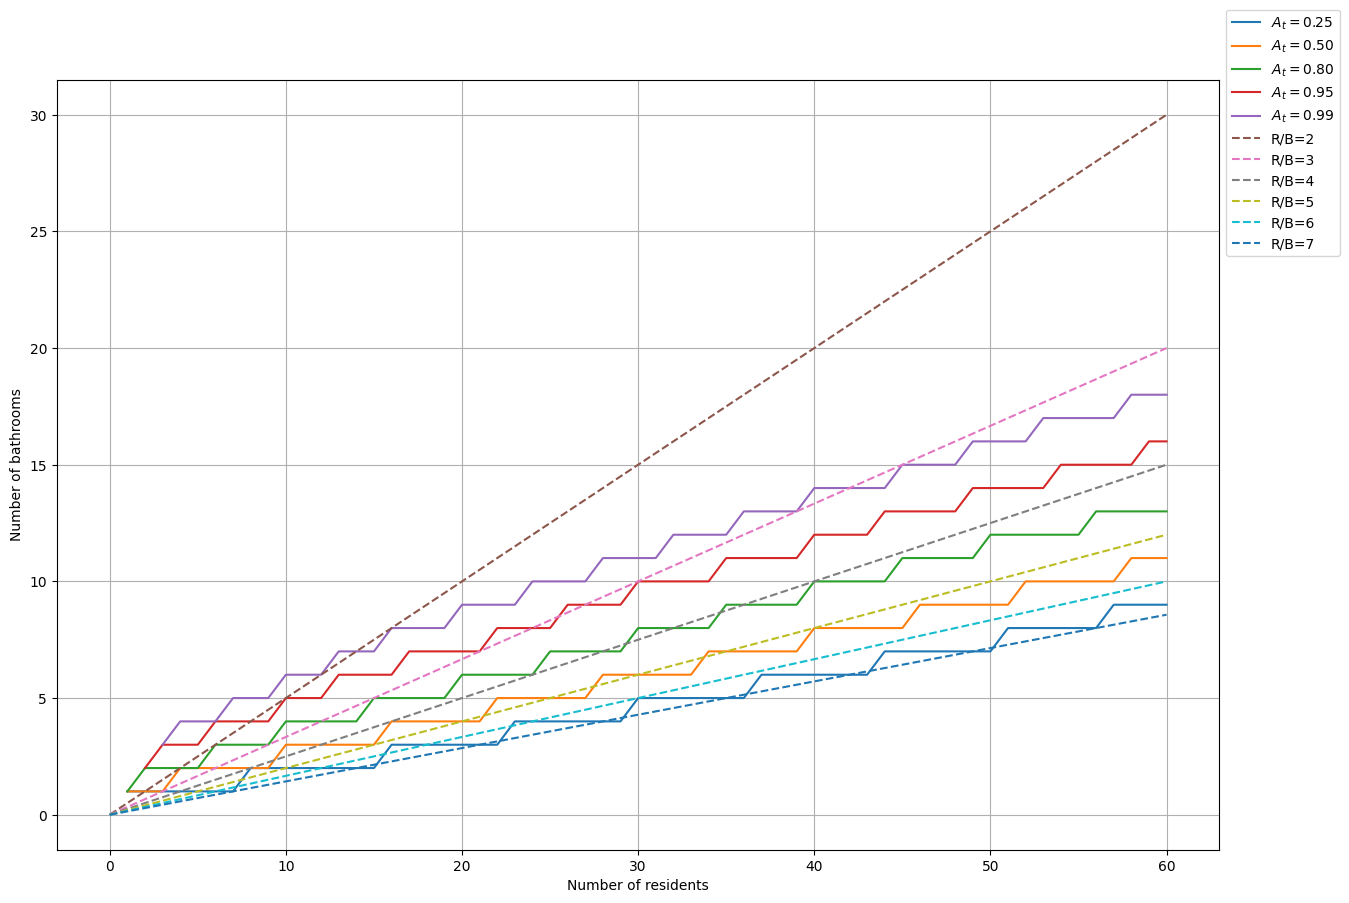

In [12]:
A_target_arr = np.array([0.25, 0.50, 0.80, 0.95, 0.99])

r_b_ratio_arr = np.arange(1, 8)[1:]

plt.figure(figsize=(15, 10))
for A_target in A_target_arr:
  plt.plot(R_arr, find_B_vec(A_target, R_arr, q), label='$A_t = {:.02f}$'.format(A_target))

for r_b_ratio in r_b_ratio_arr:
  plt.plot(R_arr, R_arr / r_b_ratio, '--', label='R/B={}'.format(r_b_ratio))

plt.xlabel('Number of residents')
plt.ylabel('Number of bathrooms')
plt.legend(bbox_to_anchor=(1, 1.1))
plt.grid()

## Future work

- Plot `find_B(0.8, 30, q)` as a function of $q$. (i.e. how does the number of bathrooms required depend on shower length for a specific co-op size & availability target?)
- Explain in words why the probability of finding an available bathroom is not just a function of the person-to-bathroom ratio.
- Plot the probabilities of having at least one bathroom open for every co-op in the Berkeley Student Co-ops and share with Alfred and people in the BSC for funzies :)))